# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

In [24]:
def eda1_n(data, var, target):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var, y=target, data=data)
    
    plt.subplot(1, 2, 2)
    sns.regplot(x=var, y=target, data=data)
    
    plt.tight_layout()
    plt.show()
    
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

1) 시각화 : scatter(regplot), jointplot

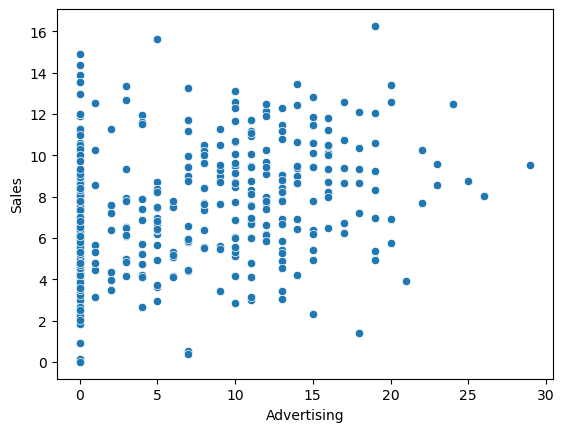

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

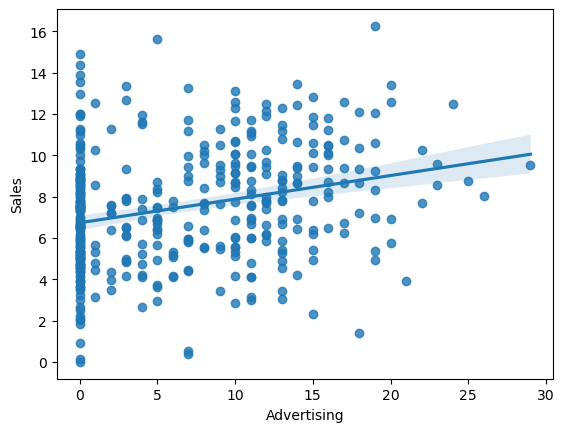

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

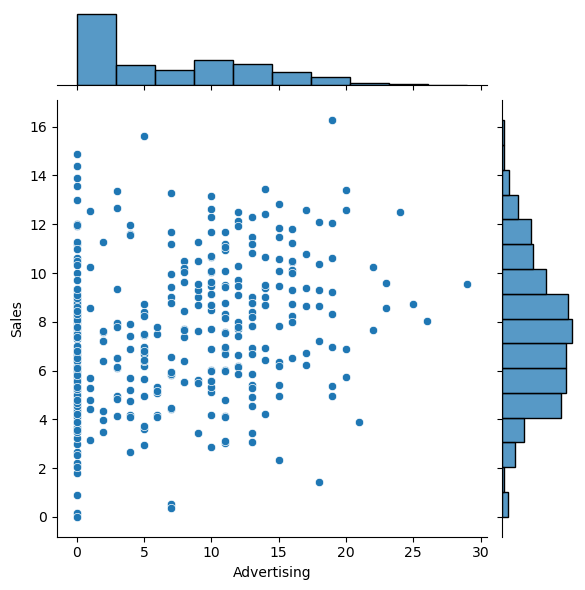

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


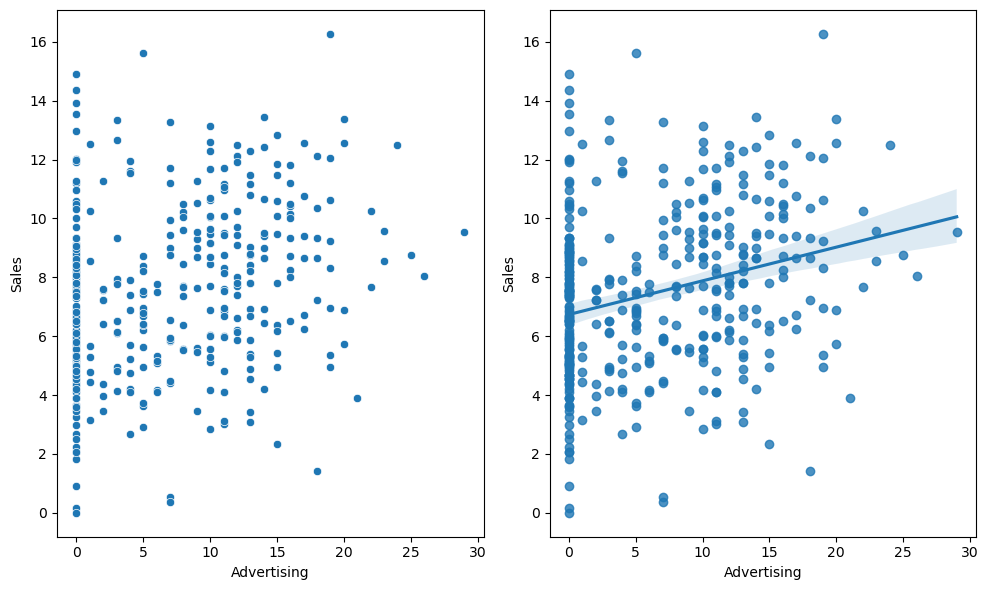

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


In [25]:
var = 'Advertising'
eda1_n(data, var, target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 0을 제외하고 봐야할 듯

In [53]:
data.isna().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
ShelveLoc           0
Age                 0
Urban               0
US                  0
Price_Diff          0
ad_not_0          144
sales_ad_not_0    144
dtype: int64

In [60]:
data.loc[data['Advertising'] > 0, 'Advertising'].isna().sum()

0

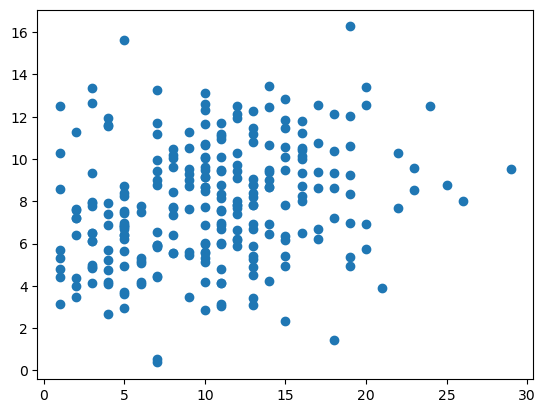

상관계수 : 0.2571829256169392, p-value : 3.11267288308643e-05


In [70]:
temp1 = data.loc[data['Advertising'] > 0, 'Advertising']
temp2 = data.loc[data['Advertising'] > 0, 'Sales']


plt.scatter(temp1, temp2)
plt.show()

result = spst.pearsonr(temp1, temp2)
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

### (2) Population -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

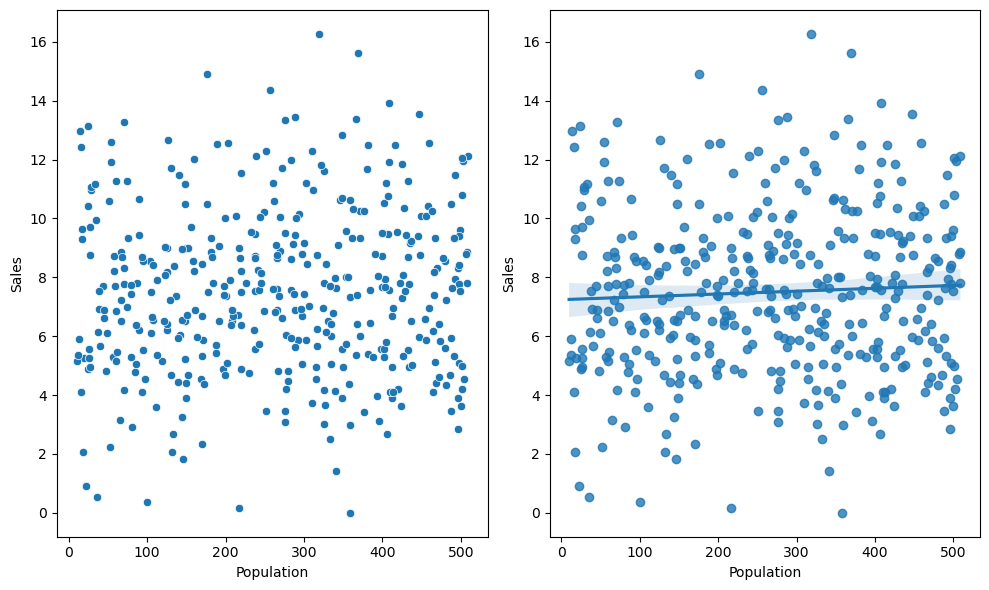

상관계수 : 0.0504709844720392, p-value : 0.31398160931903


In [26]:
var = 'Population'
eda1_n(data, var, target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 그래프와 수치상으로 관계가 없어보임 (널리 분포, 상관계수 낮고 p-value는 높다)

### (3) Price -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

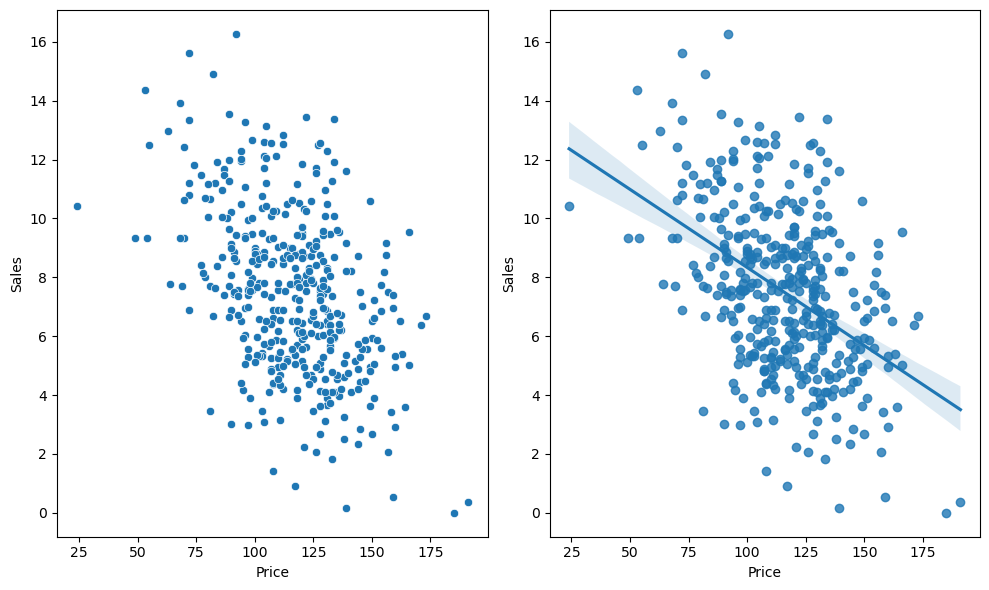

상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21


In [27]:
var = 'Price'
eda1_n(data, var, target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 가격이 높을수록 판매량이 떨어진다.
- 시각화와 수치화 두군데서 동일하게 파악할 수 있음. (상관계수 : -0.445, p-value : 7.618e-21)

### (4) Age -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

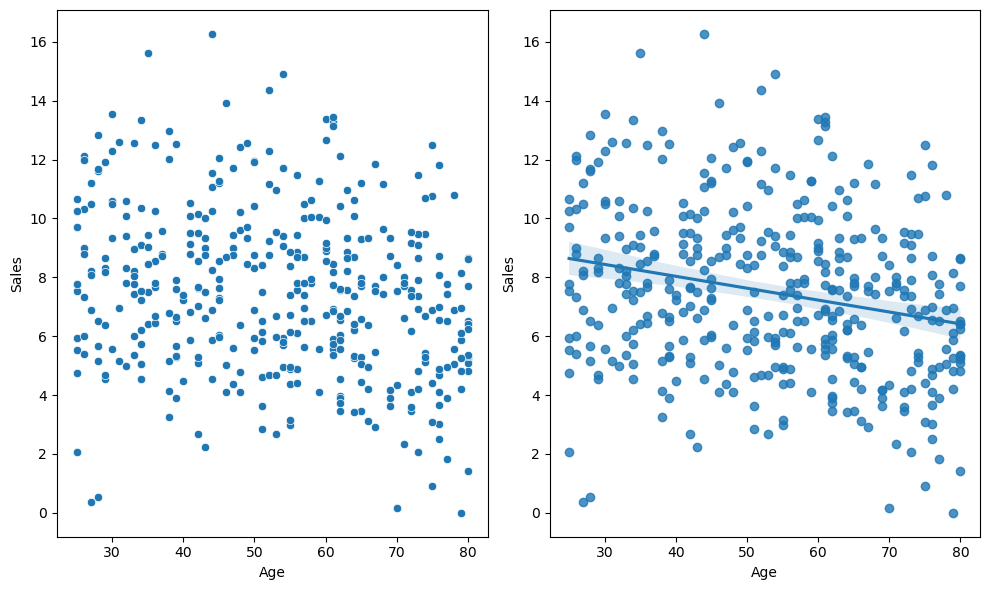

상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06


In [28]:
var = 'Age'
eda1_n(data, var, target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 어느 정도 나이가 많을수록 판매량이 떨어져보인다.
- 나이를 범주로 나누어서 살펴볼 필요도 있어보인다.

### (5) CompPrice -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

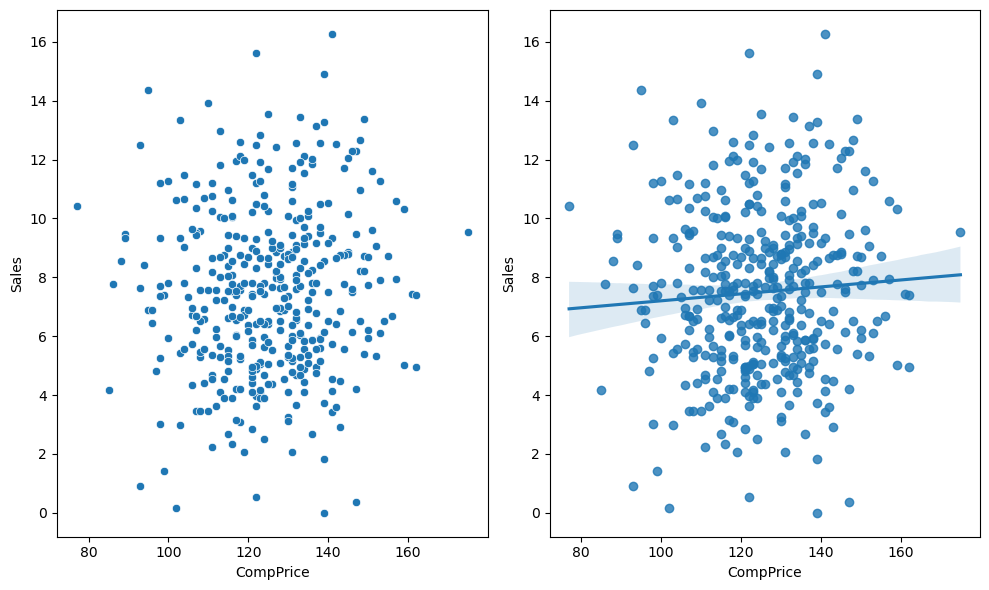

상관계수 : 0.06407872955062152, p-value : 0.2009398289418295


In [29]:
var = 'CompPrice'
eda1_n(data, var, target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 큰 상관관계가 없어보임
- 각 지점별 경쟁사 가격과 자사 제품 가격과의 차이를 판매량과 비교해볼 필요 있어보임(Price - CompPrice)

### (6) Income -> Sales

1) 시각화 : scatter

2) 수치화 : 상관분석

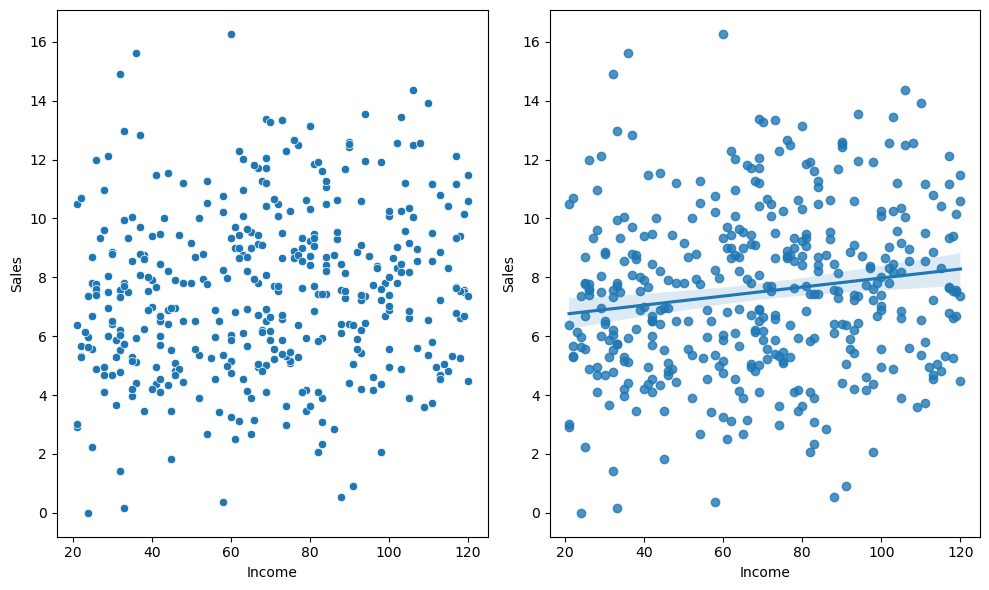

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517627


In [30]:
var = 'Income'
eda1_n(data, var, target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 약한 상관관계가 있어보임
- 다른 뭔가랑 묶어서 보면...?

### (7) Price - CompPrice -> Sales

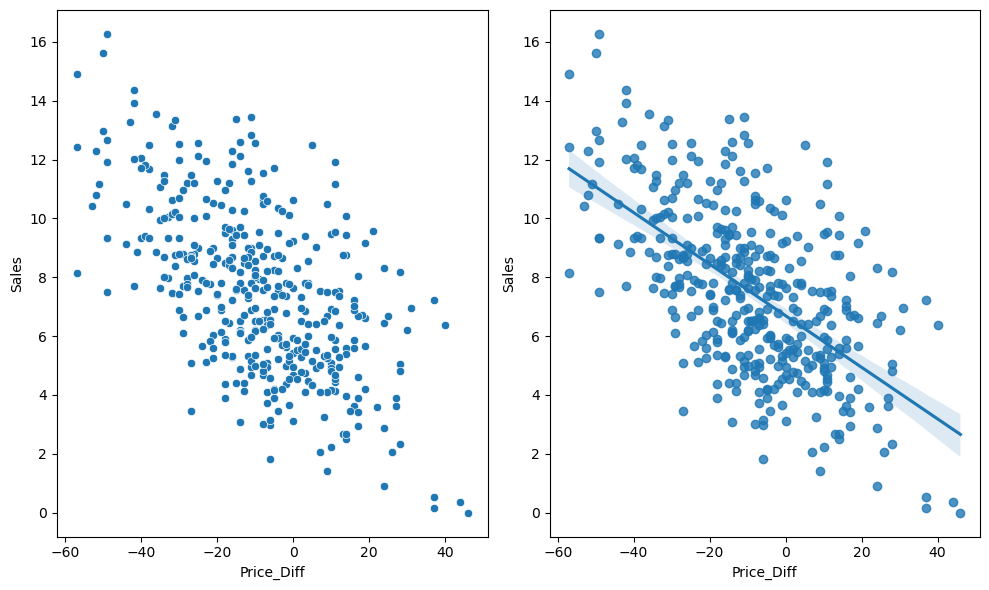

상관계수 : -0.5979217124533921, p-value : 3.877120641788835e-40


In [38]:
data['Price_Diff'] = data['Price'] - data['CompPrice']
var = 'Price_Diff'
eda1_n(data, var, target)

- Price와 비슷한 형태이나 보다 더 강한 상관관계를 보여줌.
- Price 대신 이 칼럼을 사용.

## 2.범주형 X --> Y

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

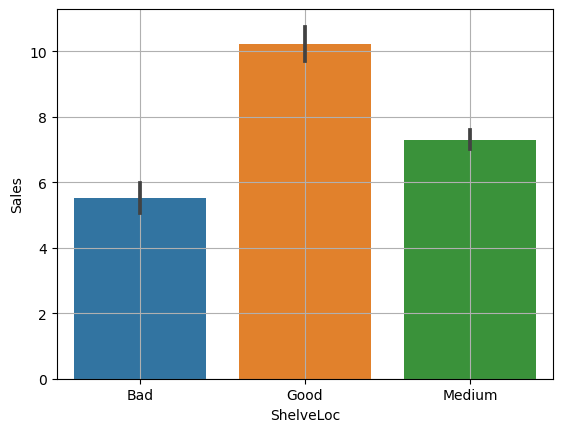

In [8]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [9]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 진열 상태에 따라 판매량의 차이가 있다.

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot

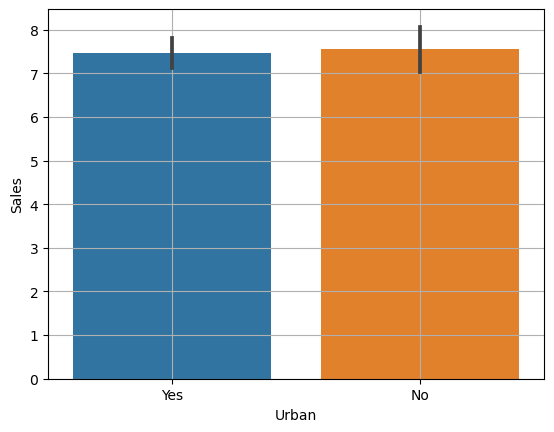

In [31]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [33]:
u_y = data.loc[data['Urban'] == 'Yes', 'Sales']
u_n = data.loc[data['Urban'] == 'No', 'Sales']

spst.ttest_ind(u_y, u_n)

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 차이가 있어보이지 않음

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

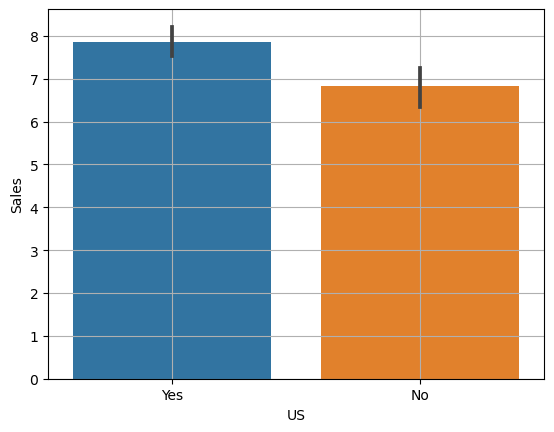

In [35]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [36]:
us_y = data.loc[data['US'] == 'Yes', 'Sales']
us_n = data.loc[data['US'] == 'No', 'Sales']

spst.ttest_ind(us_y, us_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 관계가 있어보임

## 3.관계 정리하기

① 강한관계

- ShelveLoc : F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)
- Price_Diff : 상관계수 : -0.5979217124533921, p-value : 3.877120641788835e-40

② 중간관계

- Price : 상관계수 : -0.4449507278465726, p-value : 7.61818701191294e-21
- Advertising : 상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08
- Age : 상관계수 : -0.2318154396045765, p-value : 2.7889498393711916e-06
- Income : 상관계수 : 0.15195097946754424, p-value : 0.0023096704539517627
- US : Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 관계없음

- Population : 상관계수 : 0.0504709844720392, p-value : 0.31398160931903
- CompPrice : 상관계수 : 0.06407872955062152, p-value : 0.2009398289418295
- Urban : Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)